# FAIR metrics for Titanium Dioxide (TiO2)

by [Serena Bonaretti](https://sbonaretti.github.io), Maastricht University

**Use-case: A researcher wants to collect information about Titanium Dioxide from eNanoMapper**   

- *Repository*: https://data.enanomapper.net/  
- *Data*: Endpoint, Results, Consentration, and Time point  
- *Metadata*: Publication and protocol  
e.g. https://data.enanomapper.net/substance/XLSX-7011cea0-1011-3f8b-9e8a-b3289fed836a/study

Assumption: Data and metadata are in the same repository

Characteristics of the eNanoMapper API:  
- GitHub repository: [eNanoMapper](https://github.com/enanomapper/API) 
- Documentation at http://enanomapper.github.io/API/#!/algorithm
- It uses REST API -> python libray to use is `requests`
- Output data format is .json -> python library to use is `requests`

---

### Calculating FAIR metrics

[FAIR metrics:](#metrics) 
- [F1. (Meta)data are assigned a globally unique and persistent identifier](#F1) 
- [F2. Data are described with rich metadata](#F2) 
- [F3. Metadata clearly and explicitly include the identifier of the data it describes](#F3)  
- [F4. (Meta)data are registered or indexed in a searchable resource](#F4) 
- [A1. (Meta)data are retrievable by their identifier using a standardized communications protocol](#A1)    
- [A2. Metadata are accessible, even when the data are no longer available](#A2)  
- [I1. (Meta)data use a formal, accessible, shared, and broadly applicable language for knowledge representation](#I1) 
- [I2. Metadata use vocabularies that follow FAIR principles](#I2)  
- [I3. (Meta)data include qualified references to other (meta)data](#I3)   
- [R1.1. (Meta)data are released with a clear and accessible data usage license](#R11)  
- [R1.2. (Meta)data are associated with detailed provenance](#R12)  
- [R1.3. (Meta)data meet domain-relevant community standards](#R13)

[FAIR metric indicator](#indicator)

---

Imports:

In [2]:
import bs4
import requests
import xml.etree.ElementTree as ET
import urllib
import rdflib
#import zeep

Variables:

In [2]:
chemical        = 'titanium dioxide'
repository_name = 'enanomapper' 
repository_url  = 'data.enanomapper.net'
repository_api  = 'https://data.enanomapper.net/api-docs/'
# repository_api_interface = http://enanomapper.github.io/API/

google_search    = 'https://google.com/search?q='
registry_api_url = 'https://www.re3data.org/api/v1/repositories'

rich_metadata_threshold = 5

Extract metadata from database:

In [42]:
query = 'https://data.enanomapper.net/substance?' + urllib.parse.quote('search=titanium dioxide') # search%3Dtitanium%20dioxide
r_repo = requests.get(query)
print (r_repo.text[0:3500])
#r_repo = requests.get('https://data.enanomapper.net/substance?' + urllib.parse.quote('search=titanium dioxide'))
#r_repo = requests.get('https://data.enanomapper.net/api-docs/substance/',
#                  params={'search': 'titanium dioxide'})
#r_repo.text

#root = ET.fromstring(r_repo.text)

<?xml version="1.0"?>
<!DOCTYPE rdf:RDF [
  <!ENTITY this 'https://data.enanomapper.net/'>
  <!ENTITY qudt 'http://qudt.org/schema/qudt#'>
  <!ENTITY owl 'http://www.w3.org/2002/07/owl#'>
  <!ENTITY xsd 'http://www.w3.org/2001/XMLSchema#'>
  <!ENTITY rdfs 'http://www.w3.org/2000/01/rdf-schema#'>
  <!ENTITY sso 'http://semanticscience.org/resource/'>
  <!ENTITY bao 'http://www.bioassayontology.org/bao#'>
  <!ENTITY ref 'https://data.enanomapper.net/reference/'>
  <!ENTITY mgroup 'https://data.enanomapper.net/measuregroup/'>
  <!ENTITY bx 'http://purl.org/net/nknouf/ns/bibtex#'>
  <!ENTITY sio 'http://semanticscience.org/resource/'>
  <!ENTITY dcterms 'http://purl.org/dc/terms/'>
  <!ENTITY ota 'http://www.opentox.org/algorithmTypes.owl#'>
  <!ENTITY foaf 'http://xmlns.com/foaf/0.1/'>
  <!ENTITY owner 'https://data.enanomapper.net/owner/'>
  <!ENTITY ac 'https://data.enanomapper.net/compound/'>
  <!ENTITY ad 'https://data.enanomapper.net/dataset/'>
  <!ENTITY void 'http://rdfs.org/ns/voi

In [3]:
# --> this returns the schema (ignores titanium dioxide)
#r_repo = requests.get('https://data.enanomapper.net/api-docs/substance/',
                  #params={'search': 'titanium dioxide'})
#r_repo.json()

# --> this returns error 400 

# r_repo = requests.get('https://data.enanomapper.net/substance/titanium dioxide')
# r_repo.status_code

# --> This works and returns an rdf in xml:
# r_repo = requests.get('https://data.enanomapper.net/substance?' + urllib.parse.quote('search=titanium dioxide')), # urllib.parse.quote('search=titanium dioxide') = search%3Dtitanium%20dioxide
# --> This does not work  
# r_repo.json()

# --------------------------------------------------------------------

# This works and parses the rdf
g = rdflib.Graph()
g = g.parse('https://data.enanomapper.net/substance?' + urllib.parse.quote('search=titanium dioxide'))

# Number of statements present
print ("graph has %s statements" %(len(g)))

https://data.enanomapper.net/owner/P32 - KI does not look like a valid URI, trying to serialize this will break.


graph has 74657 statements


In [4]:
# Print out the rdf ()

count = 0 # trick to stop the print out

for subj, pred, obj in g:
    
    if count < 5 : # trick to stop the print out
        
        print ("s: " + str(subj))
        print ("p: " + str(pred))
        print ("o: " + str(obj))
        print (g.value(subj,pred, None))
        print (" ")
        count = count + 1 

s: https://data.enanomapper.net/endpoint/ID2971
p: http://www.w3.org/2000/01/rdf-schema#label
o: ZETA POTENTIAL
ZETA POTENTIAL
 
s: https://data.enanomapper.net/endpoint/ID18854C1
p: http://semanticscience.org/resource/has-value
o: 5.0
5.0
 
s: https://data.enanomapper.net/endpoint/ID1131C1
p: http://semanticscience.org/resource/has-value
o:  
 
 
s: https://data.enanomapper.net/endpoint/ID1873
p: http://purl.enanomapper.net/has-condition
o: https://data.enanomapper.net/endpoint/ID1873C1
https://data.enanomapper.net/endpoint/ID1873C1
 
s: https://data.enanomapper.net/assay/NWKI-b5888475-803c-4098-8faf-d43d23172692
p: http://purl.org/dc/terms/source
o: https://data.enanomapper.net/reference/CD09A4A8
https://data.enanomapper.net/reference/CD09A4A8
 


In [10]:
# print namespaces
for nm in g.namespaces():
    print (nm)

('xml', rdflib.term.URIRef('http://www.w3.org/XML/1998/namespace'))
('rdf', rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#'))
('rdfs', rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#'))
('xsd', rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#'))
('mgroup', rdflib.term.URIRef('https://data.enanomapper.net/measuregroup/'))
('npo', rdflib.term.URIRef('http://purl.bioontology.org/ontology/npo#'))
('amb', rdflib.term.URIRef('http://purl.enanomapper.net/'))
('substance', rdflib.term.URIRef('https://data.enanomapper.net/substance/'))
('bx', rdflib.term.URIRef('http://purl.org/net/nknouf/ns/bibtex#'))
('j.0', rdflib.term.URIRef('http://purl.bioontology.org/ontology/bao#'))
('ota', rdflib.term.URIRef('http://www.opentox.org/algorithmTypes.owl#'))
('ap', rdflib.term.URIRef('https://data.enanomapper.net/protocol/'))
('dcterms', rdflib.term.URIRef('http://purl.org/dc/terms/'))
('dc', rdflib.term.URIRef('http://purl.org/dc/elements/1.1/'))
('obo', rdflib.term.URIRef(

In [ ]:
# Make the triples human readable by substituting addresses with terms

In [11]:
from rdflib import plugin
from rdflib.serializer import Serializer

#a = g.serialize(format='json-ld', indent=4)
r_repo.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [4]:
# create the graph (= object containing triples)
g = rdflib.Graph()

# parse the db and assign it to the graph ("g = " not necessary) 
g = g.parse(query) # can specify the format: e.g. format = "nt"

https://data.enanomapper.net/owner/P32 - KI does not look like a valid URI, trying to serialize this will break.


In [5]:
print ("graph has %s statements" %(len(g)))

graph has 74657 statements


In [32]:
#for i in range (0,2):
#    print (g[i])
predicates = g.predicates(subject=None, object=None)
print(predicates)
for p in predicates:
    if len(p) < 28:
        print (p)
        print (" ")

<generator object Graph.predicates at 0x115107048>


In [21]:
#count = 0
# for subj, pred, obj in g:
#     #if "titanium" in str(obj):
#     if len(pred) > 40 and len(pred) < 50:
#         count = count + 1
#         print (count)
#         print ("s: " + str(subj))
#         print ("p: " + str(pred))
#         print ("o: " + str(obj))
#         print (" ")


In [40]:
#print (len(r_repo.text)) # 8,711,876
#r_repo.text[7000000: 7500000]
r_repo.text[0: 500]

'<?xml version="1.0"?>\n<!DOCTYPE rdf:RDF [\n  <!ENTITY this \'https://data.enanomapper.net/\'>\n  <!ENTITY qudt \'http://qudt.org/schema/qudt#\'>\n  <!ENTITY owl \'http://www.w3.org/2002/07/owl#\'>\n  <!ENTITY xsd \'http://www.w3.org/2001/XMLSchema#\'>\n  <!ENTITY rdfs \'http://www.w3.org/2000/01/rdf-schema#\'>\n  <!ENTITY sso \'http://semanticscience.org/resource/\'>\n  <!ENTITY bao \'http://www.bioassayontology.org/bao#\'>\n  <!ENTITY ref \'https://data.enanomapper.net/reference/\'>\n  <!ENTITY mgroup \'https://data.ena'

In [ ]:
for j in range(0,len(root)):
    
    
    for i in range(0, len(root[j])):
        if str(root[j][i].text).find("Zeta") != -1:
           
            print ("--> " + str(j))
            print (root[j][i].tag)
            print ("   " + str(root[j][i].text))
            print (" ")


# for i in range(0, len(all_metadata)):
#     print (all_metadata[i].tag)
#     print ("   " + str(all_metadata[i].text))



# #r_repo = requests.get('https://www.ebi.ac.uk/arrayexpress/xml/v3/experiments?keywords=insulin')
# r_repo = requests.get(repository_api,
#                   params={'keywords'      : 'Parkinson''s disease',
#                           'organism'      : 'Homo sapiens',
#                           'experimenttype': 'transcription profiling by array',
#                           'raw'           : 'true',
#                           'diseasestate'  : 'Parkinson''s disease',
#                           'sa'            : ['frontal lobe', 'male', 'female']})
# print (r_repo.status_code)

# root = ET.fromstring(r_repo.text)
# print(len(root))


# # to be improved
# all_metadata = root[0]

---

<a name="metrics"></a>
### FAIR metrics

<a name="F4"></a>
#### F4. (Meta)data are registered or indexed in a searchable resource
*Interpretation for this user-case*: Data and metadata are in the same repository, which can be searched either in generic search engines  or in database registries

a. Search for repository in the generic search engine www.google.com

In [3]:
# query Google API for repository_url
r = requests.get(google_search + repository_url)
soup = bs4.BeautifulSoup(r.text, "html.parser")
link_elements = soup.select('.r a')

# find repository_url in the search output
counts = 0
for i in range(len(link_elements)):
    if (link_elements[i].find (repository_url) != -1):     
        counts = counts + 1
        

# assign F4: It is 0 if repository_url is not present  in the search output, it is 1 otherwise
if counts != 0:
    print (repository_url + " found in " + str(counts) + " urls out of " + str(len(link_elements)) )
    F4 = 1
else: 
    print (repository_url + " not found in the first " + str(len(link_elements)) + " urls")
    F4 = 0
    
print ("F4: " + str(F4))

data.enanomapper.net found in 10 urls out of 10
F4: 1


b. Search for repository in the database registry www.re3data.org 

In [4]:
# contact the registry
r_registry = requests.get(registry_api_url)
# put output string in a structured xml tree
root = ET.fromstring(r_registry.text)

# look for the wanted repository
flag = 0
for i in range (0, len(root)):
    if root[i][1].text == repository_name: # first index is a <repository> group, 
                                           # second index is for the tags inside (<id>, <name>, <link>)
        flag = 1
        repository_index = i
        
if flag == 1:        
    F4 = 1
    print ("F4: " + str(F4))
    print ("  Index in list: " + str(repository_index))
    print ("  Tag          : " + str(root[repository_index][1].tag))
    print ("  Text         : " + str(root[repository_index][1].text))
    print ("  Tag          : " + str(root[repository_index][2].tag))
    print ("  Attribute    : " + str(root[repository_index][2].attrib)) # attributes do not have a closing tag

    metadata_str = str(root[repository_index][2].attrib["href"])
    print ("  Database metadata are in: " + str(metadata_str))
else: 
    F4 = 0
    print ("Repository not found")
    print ("F4: " + str(F4))

Repository not found
F4: 0


---

<a name="F2"></a>
#### F2. Data are described with rich metadata  
Metric name: *Machine-readibility of metadata*

In [7]:
# if repository_name  == 'ChEBI':
    
#     client = zeep.Client(wsdl=repository_wsdl)
#     element_list = client.service.getLiteEntity(chemical,'CHEBI NAME',0,'ALL') 
#     # Parameters are: string, SearchCategory, maximumResults, stars
#     # To know possible parameter values: 
#     # - Type: Print (requests.get(wsdl).text)
#     # - Search for keyword (e.g. crt+F SearchCategory)
     
#     # extract the ID of the chemical (the query provides all items with one and/or two keywords, see: print (answer))
#     for i in range (0, len(element_list)):   
#         if element_list[i].chebiAsciiName == chemical:
#             # get the ID
#             chemical_ID = element_list[i].chebiId #(e.g. CHEBI:50825)
            
#     # extract the metadata
#     all_metadata = client.service.getCompleteEntity(chemical_ID)
#     print ("number of elements in complete metadata: " + str(len(all_metadata)))
#     print (all_metadata)
    
#     if len(all_metadata) > rich_metadata_threshold:
#         F2 = 1
#     else: 
#         F2 = 0
#     print ("F2: " + str(F2))

In [17]:
# extract repository number 
# repository_number = metadata_str[metadata_str.rfind('/') : len(metadata_str)]
# metadata_url
metadata_url      = repository_api 
#metadata_url      = "https://data.enanomapper.net/api-docs/substance/titanium dioxide"
print (metadata_url) 
# access the repository metadata 
r_repo = requests.get(metadata_url, 
                     param: )

if r_repo.status_code == 200:
    F2 = 1
else:
    F2 = 0
print ("F2: " + str(F2) )
print ("  access status code: " + str(r_repo.status_code))

https://data.enanomapper.net/api/search/?substance&titanium dioxide
F2: 0
  access status code: 405


In [15]:
import urllib

r_repo = requests.get('https://data.enanomapper.net/substance?' + urllib.parse.quote('search=titanium dioxide'))
r_repo

<Response [200]>

In [17]:
#r_repo.text

In [3]:
#r_repo = requests.get('https://data.enanomapper.net/api-docs/substance/',
#                  params={'search': 'titanium dioxide'})
#r_repo = requests.get('https://data.enanomapper.net/substance/XLSX-7011cea0-1011-3f8b-9e8a-b3289fed836a') # this works
r_repo = requests.get('https://data.enanomapper.net/substance/titanium+dioxide') # this does NOT work 
#r_repo = requests.get('https://data.enanomapper.net/query/compound/search/all?search=titanium dioxide')


print (r_repo.status_code)
print (r_repo.text)

400
<html>
<head>
   <title>Status page</title>
</head>
<body style="font-family: sans-serif;">
<h3>The request could not be understood by the server due to malformed syntax</h3><p>You can get technical details <a href="http://www.w3.org/Protocols/rfc2616/rfc2616-sec10.html#sec10.4.1">here</a>.<br>
Please continue your visit at our <a href="/">home page</a>.
</p>
</body>
</html>



In [39]:
r = requests.get("https://data.enanomapper.net/substance/FCSV-bc77c03d-4e75-3fab-bb3d-17b983663819")
#https://data.enanomapper.net/query/compound/search/all?search=caffeine&page=0&pagesize=1
#http://apps.ideaconsult.net:8080/ambit2/query/compound/search/all?search=caffeine&page=0&pagesize=1
#r = requests.get("https://data.enanomapper.net/substance/",
#                params={'name': 'gold'})
print (r.status_code)
print (r.text[0:1000])

200
<?xml version="1.0"?>
<!DOCTYPE rdf:RDF [
  <!ENTITY this 'https://data.enanomapper.net/'>
  <!ENTITY qudt 'http://qudt.org/schema/qudt#'>
  <!ENTITY owl 'http://www.w3.org/2002/07/owl#'>
  <!ENTITY xsd 'http://www.w3.org/2001/XMLSchema#'>
  <!ENTITY rdfs 'http://www.w3.org/2000/01/rdf-schema#'>
  <!ENTITY sso 'http://semanticscience.org/resource/'>
  <!ENTITY bao 'http://www.bioassayontology.org/bao#'>
  <!ENTITY ref 'https://data.enanomapper.net/reference/'>
  <!ENTITY mgroup 'https://data.enanomapper.net/measuregroup/'>
  <!ENTITY bx 'http://purl.org/net/nknouf/ns/bibtex#'>
  <!ENTITY sio 'http://semanticscience.org/resource/'>
  <!ENTITY dcterms 'http://purl.org/dc/terms/'>
  <!ENTITY ota 'http://www.opentox.org/algorithmTypes.owl#'>
  <!ENTITY foaf 'http://xmlns.com/foaf/0.1/'>
  <!ENTITY owner 'https://data.enanomapper.net/owner/'>
  <!ENTITY ac 'https://data.enanomapper.net/compound/'>
  <!ENTITY ad 'https://data.enanomapper.net/dataset/'>
  <!ENTITY void 'http://rdfs.org/ns

---

<a name="F1"></a>
#### F1. (Meta)data are assigned a globally unique and persistent identifier
*Interpretation*: Data and metadata have a unique identifier, either provided by the repository or by another institution

a. Unique identifier for data

In [6]:
# There is no unique identifier for data 
data_identifier = 0 # manual assignment

b. Unique identifier for metadata

In [7]:
# There is no unique identifier for metadata (ChEBI ID and definition - ChEBI ID contains an identifier but it has no identifier for itself)
metadata_identifier = 0 # manual assignment

If identifier contains DOI, it is unique and persistent 

In [8]:
if (data_identifier == 0 and metadata_identifier == 0):
    F1 = 0
print ("F1: " + str(F1) )

F1: 0


---

<a name="A2"></a>
#### A2. Metadata are accessible, even when the data are no longer available  
*Interpretation:* If metadata do not have a unique identifier, there is no guarantee that they are accessible in the future 

In [9]:
if data_identifier == 0:
    A2 = 0
print ("A2: " + str(A2))    

A2: 0


---

<a name="I1"></a>
#### I1. Metadata use a formal, accessible, shared, and broadly applicable language for knowledge representation  
Metric name: *Use a knowledge representation language*


In [10]:
# ChEBI provides metadata in XLM format using its specific schema: 
# https://www.ebi.ac.uk/webservices/chebi/2.0/webservice?wsdl
# (Information retrieved manually at https://www.ebi.ac.uk/chebi/webServices.do)
I1 = 1 # manual assignment

---

<a name="A1"></a>
#### A1. Metadata are retrievable by their identifier using a standardized communications protocol   
**A1.1 the protocol is open, free, and universally implementable**   
**A1.2 the protocol allows for an authentication and authorization procedure, where necessary**  

In [11]:
# might need some further thinking
if F2 == 1:
    A1 = 1
else:
    A1 = 0
print ("A1: " + str(A1))   

A1: 1


---

<a name="F3"></a>
#### F3. Metadata clearly and explicitly include the identifier of the data it describes  
Metrics name: *Resource identifier in metadata*  

In [12]:
if repository_name  == 'ChEBI':

    if all_metadata.chebiId != 0:
        print (all_metadata.chebiId)
        F3 = 1
    else:
        F3 = 0
    print ("F3: " + str(F3) )
    
    
if repository_name  == 'enanomapper':
    print ("")

CHEBI:50825
F3: 1


---

<a name="I3"></a>
#### I3. (Meta)data include qualified references to other (meta)data  
*Interpretation for this user-case*: (for enano mapper 

---

<a name="R11"></a>
#### R1.1. Metadata are released with a clear and accessible data usage license  
Metric name: Accessible usage license

In [13]:
# Looked for the word "license" in 
#import requests
#print (requests.get(wsdl).text)
# Word licence not found -> License is not included in metadata

In [14]:
R11 = 0

In [ ]:
r = requests.get("https://data.enanomapper.net/api-docs")
print(r.text) 
# contains license

---

<a name="I2"></a>
#### I2. Metadata use vocabularies that follow FAIR principles

<a name="R12"></a>
#### R1.2. (Meta)data are associated with detailed provenance  
See https://blog.datacite.org/exposing-doi-metadata-provenance/ with DOI https://doi.org/10.5438/wy92-xj57

<a name="R13"></a>
#### R1.3. (Meta)data meet domain-relevant community standards

---
---

<a name="indicator"></a>
### FAIR metric indicator

In [15]:
FAIR_metric_score = F1 + F2 + F3 + F4 + A1 + A2 + I1 + R11 # + I2 + I3 + + R12 + R13 
print ("The FAIR indicator for the chemical " + chemical + " is: " + str(FAIR_metric_score))

The FAIR indicator for the chemical gold nanoparticle is: 5


In [1]:
import matplotlib.pyplot as plt

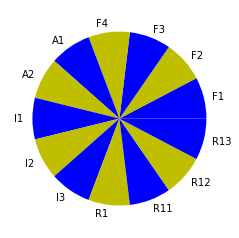

In [11]:
all_labels = ["F1", "F2", "F3", "F4", "A1", "A2", "I1", "I2", "I3", "R1", "R11", "R12", "R13"]
all_values = [7.7] * len(all_labels)
all_colors = ["b", "y", "b", "y", "b", "y", "b", "y", "b", "y", "b", "y", "b", "y", "r"]

plt.pie(all_values, labels = all_labels, colors = all_colors)
plt.show()

---
---

## Dependencies 

In [16]:
%reload_ext watermark
%watermark -v -m -p zeep

CPython 3.7.1
IPython 6.5.0

zeep 3.3.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
